# Cross-resource comparison of compounds in patents
This notebook has the distribution of patented compounds across three major chemical resources namely PubChem, ChEMBL, and DrugBank data resources

# Import Modules

In [1]:
import os
import pandas as pd
import matplotlib as mpl
import seaborn as sns
import pylab
from matplotlib.patches import Ellipse
import matplotlib.pyplot as plt
from itertools import chain

In [2]:
mpl.rcParams['figure.dpi'] = 400
sns.set(context='paper', style='white') 

# Add path constants

In [3]:
FIG_DIR = 'data/figures'

In [4]:
os.makedirs(FIG_DIR, exist_ok=True)

# Load data file

In [5]:
surechem_df = pd.read_csv('data/EDA_df.txt.gz', sep='\t', compression='gzip')
surechem_df.head(2)

,SureChEMBL_ID,SMILES,InChIKey,PATENT_ID,PUBLICATION_DATE,Field
0,SCHEMBL4,C[C@H](CS)C(=O)N1CCC[C@H]1C(O)=O,FAKRSMQSSFJEIM-RQJHMYQMSA-N,EP-2842582-A2,2015-03-04,Description
1,SCHEMBL4,C[C@H](CS)C(=O)N1CCC[C@H]1C(O)=O,FAKRSMQSSFJEIM-RQJHMYQMSA-N,EP-2838373-A2,2015-02-25,Description


In [6]:
surechem_df.drop_duplicates(subset=['InChIKey'], inplace=True)
len(surechem_df)

10686744

In [7]:
mapping_cid_df = pd.read_parquet('data/surechembl_pubchem_map.pq.gzip')
mapping_cid_df.columns = ['cid', 'inchi', 'InChIKey']
mapping_cid_df.head(2)

,cid,inchi,InChIKey
0,1,InChI=1S/C9H17NO4/c1-7(11)14-8(5-9(12)13)6-10(...,RDHQFKQIGNGIED-UHFFFAOYSA-N
1,2,InChI=1S/C9H17NO4/c1-7(11)14-8(5-9(12)13)6-10(...,RDHQFKQIGNGIED-UHFFFAOYSA-O


In [8]:
merged_df = pd.merge(surechem_df, mapping_cid_df, how="left", on=["InChIKey"])
merged_df.drop_duplicates(keep='first', inplace=True)
merged_df.head(2)

,SureChEMBL_ID,SMILES,InChIKey,PATENT_ID,PUBLICATION_DATE,Field,cid,inchi
0,SCHEMBL4,C[C@H](CS)C(=O)N1CCC[C@H]1C(O)=O,FAKRSMQSSFJEIM-RQJHMYQMSA-N,EP-2842582-A2,2015-03-04,Description,44093.0,InChI=1S/C9H15NO3S/c1-6(5-14)8(11)10-4-2-3-7(1...
1,SCHEMBL9,O=C(O)\C=C/C(=O)O.CCOC(=O)[C@H](CCC1=CC=CC=C1)...,OYFJQPXVCSSHAI-QFPUQLAESA-N,EP-2838373-A2,2015-02-25,Description,5388961.0,InChI=1S/C20H28N2O5.C4H4O4/c1-3-27-20(26)16(12...


In [9]:
data_df = merged_df[['SureChEMBL_ID', 'InChIKey', 'cid']]
data_df.drop_duplicates(subset=['InChIKey'], inplace=True)
len(data_df)

C:\Users\Shantanu Shetty\AppData\Local\Temp\ipykernel_18420\3529336853.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_df.drop_duplicates(subset=['InChIKey'], inplace=True)


10686744

In [10]:
chem_df = pd.read_parquet('data/chembl.pq.gzip')
chem_df.columns = ['chembl_id', 'clinical_phase', 'InChIKey']
chem_df.head(2)

,chembl_id,clinical_phase,InChIKey
0,CHEMBL6329,NaN,OWRSAHYFSSNENM-UHFFFAOYSA-N
1,CHEMBL6328,NaN,ZJYUMURGSZQFMH-UHFFFAOYSA-N


In [11]:
merg_df = pd.merge(data_df, chem_df, how="left", on=["InChIKey"])
merg_df.drop_duplicates(keep='first', inplace=True)
merg_df.head(2)

,SureChEMBL_ID,InChIKey,cid,chembl_id,clinical_phase
0,SCHEMBL4,FAKRSMQSSFJEIM-RQJHMYQMSA-N,44093.0,CHEMBL1560,4.0
1,SCHEMBL9,OYFJQPXVCSSHAI-QFPUQLAESA-N,5388961.0,CHEMBL1200659,4.0


In [25]:
len(merg_df)

10686744

In [12]:
df = merg_df[['SureChEMBL_ID', 'InChIKey', 'cid', 'chembl_id']]
df.head(2)

,SureChEMBL_ID,InChIKey,cid,chembl_id
0,SCHEMBL4,FAKRSMQSSFJEIM-RQJHMYQMSA-N,44093.0,CHEMBL1560
1,SCHEMBL9,OYFJQPXVCSSHAI-QFPUQLAESA-N,5388961.0,CHEMBL1200659


In [13]:
drugbank_df = pd.read_csv('data/drugbank_approved_structure_links.csv.zip')
drugbank_df.head(2) 

,DrugBank ID,Name,CAS Number,Drug Groups,InChIKey,InChI,SMILES,Formula,KEGG Compound ID,KEGG Drug ID,PubChem Compound ID,PubChem Substance ID,ChEBI ID,ChEMBL ID,HET ID,ChemSpider ID,BindingDB ID
0,DB00006,Bivalirudin,128270-60-0,approved; investigational,OIRCOABEOLEUMC-GEJPAHFPSA-N,InChI=1S/C98H138N24O33/c1-5-52(4)82(96(153)122...,CC[C@H](C)[C@H](NC(=O)[C@H](CCC(O)=O)NC(=O)[C@...,C98H138N24O33,NaN,D03136,16129704.0,46507415.0,59173.0,CHEMBL2103749,NaN,10482069.0,50248103.0
1,DB00007,Leuprolide,53714-56-0,approved; investigational,GFIJNRVAKGFPGQ-LIJARHBVSA-N,InChI=1S/C59H84N16O12/c1-6-63-57(86)48-14-10-2...,CCNC(=O)[C@@H]1CCCN1C(=O)[C@H](CCCNC(N)=N)NC(=...,C59H84N16O12,C07612,D08113,NaN,46507635.0,6427.0,CHEMBL1201199,NaN,571356.0,50369395.0


In [14]:
final_df = pd.merge(df, drugbank_df, how="left", on=["InChIKey"])
final_df.drop_duplicates(keep='first', inplace=True)
final_df.head(2)

,SureChEMBL_ID,InChIKey,cid,chembl_id,DrugBank ID,Name,CAS Number,Drug Groups,InChI,SMILES,Formula,KEGG Compound ID,KEGG Drug ID,PubChem Compound ID,PubChem Substance ID,ChEBI ID,ChEMBL ID,HET ID,ChemSpider ID,BindingDB ID
0,SCHEMBL4,FAKRSMQSSFJEIM-RQJHMYQMSA-N,44093.0,CHEMBL1560,DB01197,Captopril,62571-86-2,approved,InChI=1S/C9H15NO3S/c1-6(5-14)8(11)10-4-2-3-7(1...,C[C@H](CS)C(=O)N1CCC[C@H]1C(O)=O,C9H15NO3S,NaN,D00251,44093.0,46506879.0,3380.0,CHEMBL1560,X8Z,40130.0,21642.0
1,SCHEMBL9,OYFJQPXVCSSHAI-QFPUQLAESA-N,5388961.0,CHEMBL1200659,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [15]:
len(final_df)

10686744

# SureChEMBL

In [16]:
surechembl_cpds = final_df['InChIKey'].tolist() 
len(surechembl_cpds) 

10686744

# Pubchem

In [17]:
Pubchem_df = final_df[['InChIKey', 'cid']]
Pubchem_df.dropna(subset=['cid'], inplace=True)
pubchem_cpds = Pubchem_df['InChIKey'].tolist()
len(pubchem_cpds) 

C:\Users\Shantanu Shetty\AppData\Local\Temp\ipykernel_18420\4017514140.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Pubchem_df.dropna(subset=['cid'], inplace=True)


10089885

# ChEMBL

In [18]:
ChEMBL_df = final_df[['InChIKey', 'chembl_id']]
ChEMBL_df.dropna(subset=['chembl_id'], inplace=True)
chembl_cpds = ChEMBL_df['InChIKey'].tolist()
len(chembl_cpds)

C:\Users\Shantanu Shetty\AppData\Local\Temp\ipykernel_18420\1122038260.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ChEMBL_df.dropna(subset=['chembl_id'], inplace=True)


318139

# Drugbank

In [19]:
DrugBank_df = final_df[['InChIKey', 'DrugBank ID']]
DrugBank_df.dropna(subset=['DrugBank ID'], inplace=True)
drugbank_cpds = DrugBank_df['InChIKey'].tolist()
len(drugbank_cpds)

C:\Users\Shantanu Shetty\AppData\Local\Temp\ipykernel_18420\3291696259.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DrugBank_df.dropna(subset=['DrugBank ID'], inplace=True)


2096

# Visualisation

In [20]:
alignment = {'horizontalalignment':'center', 'verticalalignment':'baseline'}
colors = ['r', 'b', 'g', 'c']

In [21]:
def venn(data, names=None, fill="number", show_names=True, show_plot=True, **kwds):
    
    """method to create venn diagram"""  
    
    venn4(data, names, fill, show_names, show_plot, **kwds)

In [22]:
def get_labels(data, fill="number"):
    
    """method to get labels for venn diagram"""
    
    N = len(data)

    sets_data = [set(data[i]) for i in range(N)]  
    s_all = set(chain(*data))                             

    set_collections = {}
    for n in range(1, 2**N):
        key = bin(n).split('0b')[-1].zfill(N)
        value = s_all
        sets_for_intersection = [sets_data[i] for i in range(N) if  key[i] == '1']
        sets_for_difference = [sets_data[i] for i in range(N) if  key[i] == '0']
        for s in sets_for_intersection:
            value = value & s
        for s in sets_for_difference:
            value = value - s
        set_collections[key] = value

    if fill == "number":
        labels = {k: len(set_collections[k]) for k in set_collections}
    elif fill == "logic":
        labels = {k: k for k in set_collections}
    elif fill == "both":
        labels = {k: ("%s: %d" % (k, len(set_collections[k]))) for k in set_collections}
    else:  
        raise Exception("invalid value for fill")

    return labels

In [23]:
def venn4(data=None, names=None, fill="number", show_names=True, show_plot=True, **kwds):
    
    """formatting venn diagram text, name and orientation"""

    if (data is None) or len(data) != 4:
        raise Exception("length of data should be 4!")
    if (names is None) or (len(names) != 4):
        names = ("set 1", "set 2", "set 3", "set 4")

    labels = get_labels(data, fill=fill)

    if 'figsize' in kwds and len(kwds['figsize']) == 2:
        figsize = kwds['figsize']
    else: 
        figsize = (10, 10)

    fig = pylab.figure(figsize=figsize)  
    ax = fig.gca()
    patches = []
    width, height = 170, 110  
    patches.append(Ellipse((170, 170), width, height, -45, color=colors[0], alpha=0.5))
    patches.append(Ellipse((200, 200), width, height, -45, color=colors[1], alpha=0.5))
    patches.append(Ellipse((200, 200), width, height, -135, color=colors[2], alpha=0.5))
    patches.append(Ellipse((230, 170), width, height, -135, color=colors[3], alpha=0.5))
    for e in patches:
        ax.add_patch(e)
    ax.set_xlim(80, 320); ax.set_ylim(80, 320)
    ax.set_xticks([]); ax.set_yticks([]);
    ax.set_aspect("equal")
    for spine in fig.gca().spines.values():
        spine.set_visible(False)


    # 1
    pylab.text(120, 200, labels['1000'], **alignment, fontsize=18)
    pylab.text(280, 200, labels['0100'], **alignment, fontsize=18)
    pylab.text(155, 250, labels['0010'], **alignment, fontsize=18)
    pylab.text(245, 250, labels['0001'], **alignment, fontsize=18)
    # 2
    pylab.text(200, 115, labels['1100'], **alignment, fontsize=18)
    pylab.text(140, 225, labels['1010'], **alignment, fontsize=18)
    pylab.text(145, 155, labels['1001'], **alignment, fontsize=18)
    pylab.text(255, 155, labels['0110'], **alignment, fontsize=18)
    pylab.text(260, 225, labels['0101'], **alignment, fontsize=18)
    pylab.text(200, 240, labels['0011'], **alignment, fontsize=18)
    # 3
    pylab.text(235, 205, labels['0111'], **alignment, fontsize=18)
    pylab.text(165, 205, labels['1011'], **alignment, fontsize=18)
    pylab.text(225, 135, labels['1101'], **alignment, fontsize=18)
    pylab.text(175, 135, labels['1110'], **alignment, fontsize=18)
    # 4
    pylab.text(200, 175, labels['1111'], **alignment, fontsize=18)

    if show_names:
        pylab.text(110, 110, names[0], fontsize=18, **alignment)
        pylab.text(290, 110, names[1], fontsize=18, **alignment)
        pylab.text(270, 275, names[2], fontsize=18, **alignment)
        pylab.text(130, 275, names[3], fontsize=18, **alignment)


    if show_plot:
        plt.savefig(f'{FIG_DIR}/figure_2.png',dpi=400)
        pylab.show()

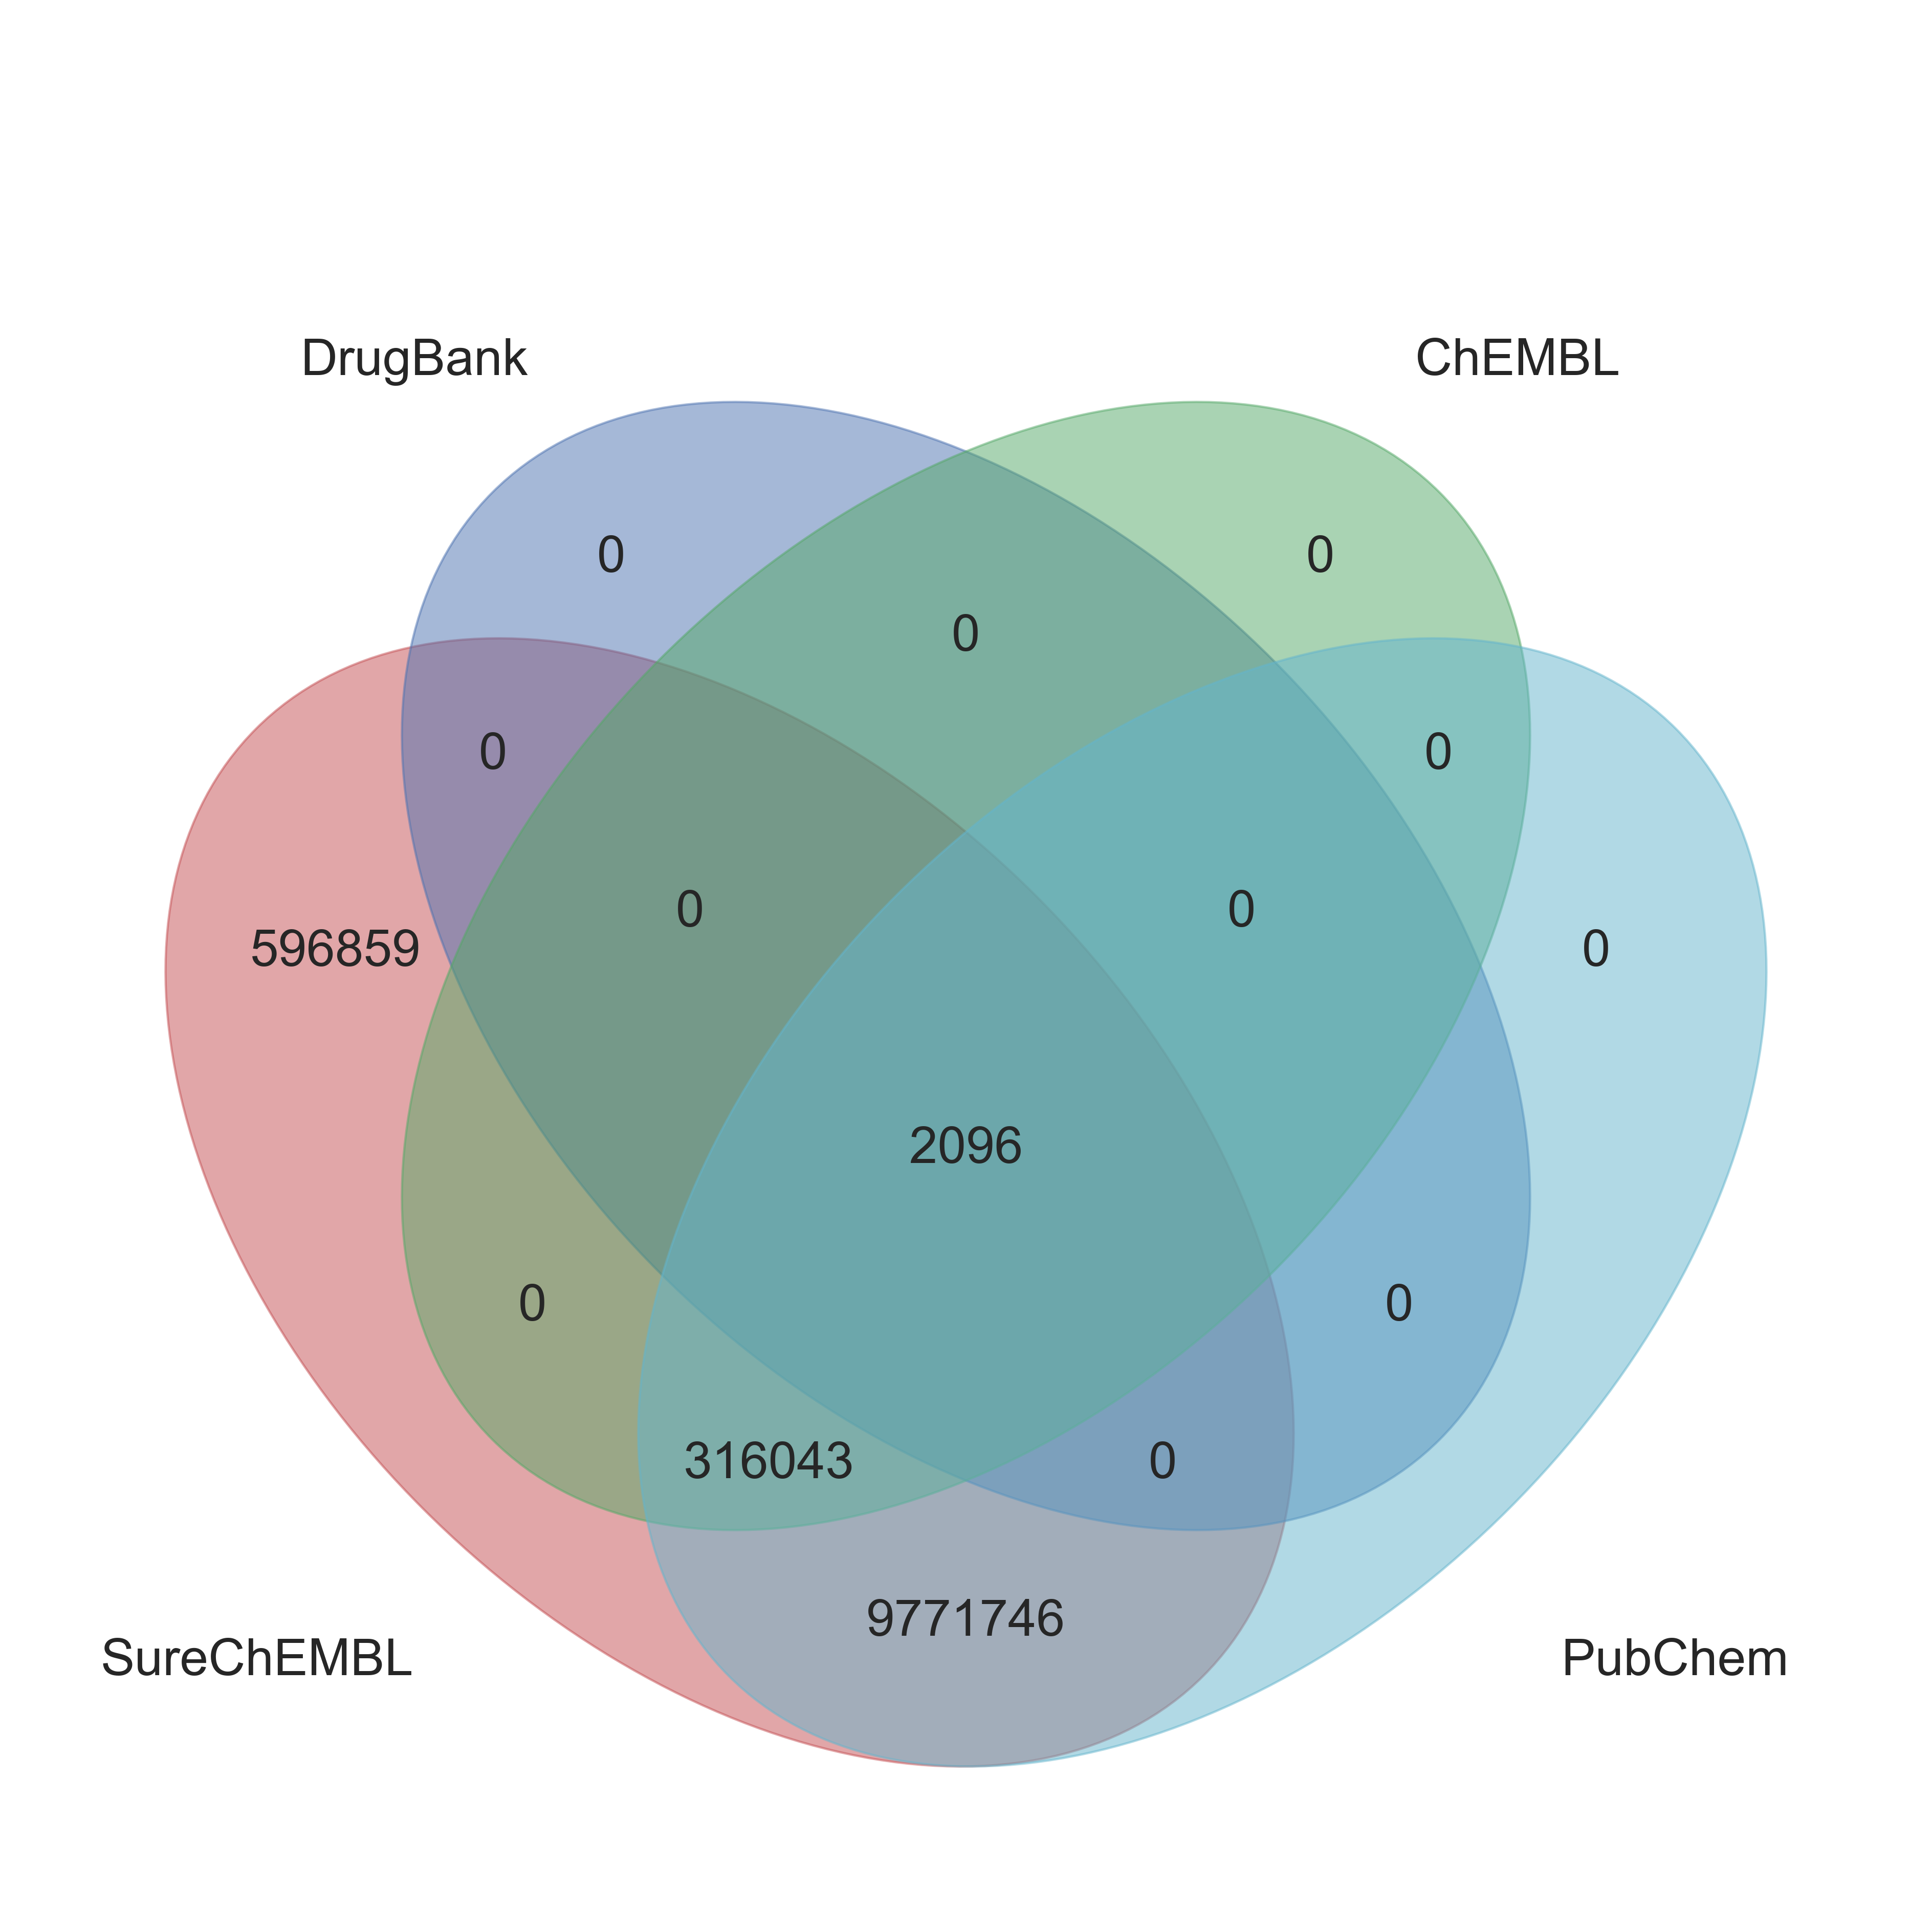

In [24]:
venn(
    [range(len(surechembl_cpds)), range(len(pubchem_cpds)), range(len(chembl_cpds)), range(len(drugbank_cpds))], 
    ["SureChEMBL", "PubChem", "ChEMBL", "DrugBank"], 
    figsize=(12,12)
)